# Analyzing Cafe Sales Data #

This is a fictitious Cafe and we are tasked as a data analyst to discover how to genereate more revenue for this establishment and get more intersting insights in the data!
#### Goals of this analysis ####
***
* What is the average order value of a tranasaction?
* Which days tend to have the most customers? 
* Which days do we gain the most revenue?
* What are our most popular items?
* Is the revenue consistent or seasonal?






In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = r'C:\Users\junsheng\Desktop\cafe_data\cafe-sales-dirty-data-for-cleaning-training\versions\1\dirty_cafe_sales.csv'

file = pd.read_csv(path, sep = ",")


In [199]:
copied_cafe_data = file.copy(deep= True) #creating copy of the file to not make changes to the original data

## Conceptualising and understanding the dataset ##

In [200]:
copied_cafe_data.head()#exploring the dataset

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [201]:
copied_cafe_data.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [202]:
copied_cafe_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [203]:
#Summarising the dataset
copied_cafe_data.describe(include= 'all')

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [204]:
#Checking Null values in each column
copied_cafe_data.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [205]:
copied_cafe_data['Transaction Date'].value_counts(dropna= False)

UNKNOWN       159
NaN           159
ERROR         142
2023-06-16     40
2023-02-06     40
             ... 
2023-04-27     15
2023-09-24     15
2023-07-22     14
2023-03-11     14
2023-02-17     14
Name: Transaction Date, Length: 368, dtype: int64

After taking a quick look at the data, we can see that this is a cafe sales data set where each row represents a transcation made in the cafe where the most critical columns are `Total Spent` and the `Transaction Date` .There are also supplementary information like type of product , total quantity of product sold per transaction, what they used to pay and whether they ate in the cafe of takeaway

There seems to be some inconsitentcies and blank values in the data in mutiple columns, lets dive deeper and try to clean the data

## Locating and Solving Solvable Issues ##

We can see from the data above that some entries are labeled 'ERROR' and 'Unknown' and are not counted under null , hence we need to replace these errors with the null value

In [206]:
copied_cafe_data['Item'].value_counts(dropna= False) #Checking ofr Unknown and error values in the column

Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
UNKNOWN      344
NaN          333
ERROR        292
Name: Item, dtype: int64

In [207]:
copied_cafe_data['Quantity'].value_counts(dropna= False)#Checking ofr Unknown and error values in the column

5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
NaN         138
Name: Quantity, dtype: int64

In [208]:
copied_cafe_data['Price Per Unit'].value_counts(dropna= False)#Checking ofr Unknown and error values in the column


3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
NaN         179
UNKNOWN     164
Name: Price Per Unit, dtype: int64

In [209]:
copied_cafe_data['Total Spent'].value_counts(dropna= False)#Checking ofr Unknown and error values in the column

6.0        979
12.0       939
3.0        930
4.0        923
20.0       746
15.0       734
8.0        677
10.0       524
2.0        497
9.0        479
5.0        468
16.0       444
25.0       259
7.5        237
1.0        232
4.5        225
1.5        205
NaN        173
UNKNOWN    165
ERROR      164
Name: Total Spent, dtype: int64

All the columns mentioned above have `UNKNOWN` and `NaN` errors and we need to change it to null values

In [210]:
replace_dict = {'UNKNOWN': np.nan, 'ERROR' : np.nan}

copied_cafe_data['Transaction Date'].replace(replace_dict, inplace= True)#replaceing the values inplace
copied_cafe_data['Transaction Date'].value_counts(dropna= False)

NaN           460
2023-02-06     40
2023-06-16     40
2023-03-13     39
2023-07-21     39
             ... 
2023-04-27     15
2023-11-24     15
2023-03-11     14
2023-02-17     14
2023-07-22     14
Name: Transaction Date, Length: 366, dtype: int64

In [211]:
copied_cafe_data['Item'].replace(replace_dict, inplace= True)#replaceing the values inplace
copied_cafe_data['Item'].value_counts(dropna= False)


Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
NaN          969
Name: Item, dtype: int64

In [212]:
copied_cafe_data['Quantity'].replace(replace_dict, inplace= True)#replaceing the values inplace
copied_cafe_data['Quantity'].value_counts(dropna= False)

5      2013
2      1974
4      1863
3      1849
1      1822
NaN     479
Name: Quantity, dtype: int64

In [213]:
copied_cafe_data['Price Per Unit'].replace(replace_dict, inplace= True)#replaceing the values inplace
copied_cafe_data['Price Per Unit'].value_counts(dropna= False)


3.0    2429
4.0    2331
2.0    1227
5.0    1204
1.0    1143
1.5    1133
NaN     533
Name: Price Per Unit, dtype: int64

In [214]:
copied_cafe_data['Total Spent'].replace(replace_dict, inplace= True)#replaceing the values inplace
copied_cafe_data['Total Spent'].value_counts(dropna= False)

6.0     979
12.0    939
3.0     930
4.0     923
20.0    746
15.0    734
8.0     677
10.0    524
NaN     502
2.0     497
9.0     479
5.0     468
16.0    444
25.0    259
7.5     237
1.0     232
4.5     225
1.5     205
Name: Total Spent, dtype: int64

Although there are some `UNKNOWN` and `ERROR` in the `Location` and `Payment Method` Column, I did not change them as they are not needed in this analysis

In [215]:
copied_cafe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9031 non-null   object
 2   Quantity          9521 non-null   object
 3   Price Per Unit    9467 non-null   object
 4   Total Spent       9498 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9540 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


Now to change the columns to their correct datatype

In [216]:
copied_cafe_data['Transaction Date'] = pd.to_datetime(copied_cafe_data['Transaction Date'])
copied_cafe_data['Quantity'] = pd.to_numeric(copied_cafe_data['Quantity'])
copied_cafe_data['Price Per Unit'] = pd.to_numeric(copied_cafe_data['Price Per Unit'])
copied_cafe_data['Total Spent'] = pd.to_numeric(copied_cafe_data['Total Spent'])


In [217]:
copied_cafe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9031 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [218]:
earliest_date = copied_cafe_data['Transaction Date'].min()
latest_date = copied_cafe_data['Transaction Date'].max()
print(f"Transaction Data is from {earliest_date} to {latest_date}")

Transaction Data is from 2023-01-01 00:00:00 to 2023-12-31 00:00:00


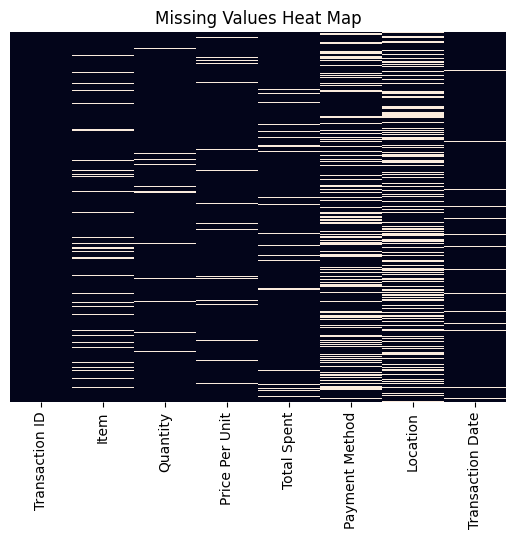

In [219]:
sns.heatmap(copied_cafe_data.isnull(), cbar = False, yticklabels= False)
plt.title("Missing Values Heat Map")
plt.show()

As we can see now there are many null values in the `Payment Method` and `Location` columns, hence we wont be using them in our analysis, there is also a considerbale amount of null values in the `item` column we should see if we can solve this issue

In [220]:
copied_cafe_data.columns = copied_cafe_data.columns.str.lower().str.replace(' ', '_')# changed the column names to the snakecase format 
                                                                                     #p.s should have done this earlier in the code but forgot to do so
copied_cafe_data.columns

Index(['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent',
       'payment_method', 'location', 'transaction_date'],
      dtype='object')

In [221]:
copied_cafe_data[copied_cafe_data['price_per_unit'].isnull()].head(10)


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
56,TXN_3578141,Cake,5.0,NaN,15.0,NaN,Takeaway,2023-06-27
65,TXN_4987129,Sandwich,3.0,NaN,NaN,NaN,In-store,2023-10-20
68,TXN_8427104,Salad,2.0,NaN,10.0,NaN,In-store,2023-10-27
85,TXN_8035512,Tea,3.0,NaN,4.5,Cash,UNKNOWN,2023-10-29
104,TXN_7447872,Juice,2.0,NaN,6.0,NaN,NaN,NaT
118,TXN_4633784,NaN,5.0,NaN,15.0,NaN,In-store,2023-02-06
140,TXN_2484241,Cake,3.0,NaN,9.0,Digital Wallet,NaN,2023-07-19
147,TXN_9336980,Salad,4.0,NaN,20.0,Cash,In-store,2023-06-06
151,TXN_4031509,NaN,4.0,NaN,16.0,Credit Card,Takeaway,2023-01-04
161,TXN_7965998,Juice,1.0,NaN,3.0,Credit Card,In-store,2023-11-02


Assuming price of item wont change , we can infer from other transaction records that has a non null `price per unit` and sold the same item to replace the null values

In [222]:
unique_items = copied_cafe_data['item'].unique()
items_sold = [item for item in unique_items if item is not np.nan]#removing Nan from unique
items_sold

['Coffee', 'Cake', 'Cookie', 'Salad', 'Smoothie', 'Sandwich', 'Juice', 'Tea']

In [223]:
item_price_dict = {}
for item in items_sold:
    item_price_dict[item] = copied_cafe_data[copied_cafe_data['item'] == item]['price_per_unit'].value_counts().index

item_price_dict

{'Coffee': Float64Index([2.0], dtype='float64'),
 'Cake': Float64Index([3.0], dtype='float64'),
 'Cookie': Float64Index([1.0], dtype='float64'),
 'Salad': Float64Index([5.0], dtype='float64'),
 'Smoothie': Float64Index([4.0], dtype='float64'),
 'Sandwich': Float64Index([4.0], dtype='float64'),
 'Juice': Float64Index([3.0], dtype='float64'),
 'Tea': Float64Index([1.5], dtype='float64')}

We can see that there is only one price per item hence it confirms our assumption that price of an item doesnt change.Hence we can input the missing `price per item` data with the prices from the above mentioned dictionary

In [224]:
#Cleaning up the dictionary
for key in item_price_dict:
    item_price_dict[key] = item_price_dict[key][0]
item_price_dict

{'Coffee': 2.0,
 'Cake': 3.0,
 'Cookie': 1.0,
 'Salad': 5.0,
 'Smoothie': 4.0,
 'Sandwich': 4.0,
 'Juice': 3.0,
 'Tea': 1.5}

In [225]:
print(f"Null entires in the price_per_unit_column before replacing null values: {copied_cafe_data['price_per_unit'].isnull().sum()}")

Null entires in the price_per_unit_column before replacing null values: 533


In [226]:
#Replace the null values in the price per unit column with a valid record in the item column using the item price dictonary

copied_cafe_data['price_per_unit'] = copied_cafe_data['price_per_unit'].fillna(copied_cafe_data['item'].map(item_price_dict))
print(f"Null entires in the price_per_unit_column after replacing null values: {copied_cafe_data['price_per_unit'].isnull().sum()}")

Null entires in the price_per_unit_column after replacing null values: 54


In [227]:
copied_cafe_data.loc[copied_cafe_data['price_per_unit'].isnull()].head(20)

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
118,TXN_4633784,NaN,5.0,NaN,15.0,NaN,In-store,2023-02-06
151,TXN_4031509,NaN,4.0,NaN,16.0,Credit Card,Takeaway,2023-01-04
289,TXN_3495950,NaN,4.0,NaN,6.0,Credit Card,In-store,2023-02-19
334,TXN_2523298,NaN,4.0,NaN,6.0,ERROR,In-store,2023-03-25
550,TXN_4186681,NaN,4.0,NaN,6.0,Digital Wallet,NaN,2023-05-24
750,TXN_5787508,NaN,3.0,NaN,9.0,Credit Card,Takeaway,2023-07-23
818,TXN_7940202,NaN,1.0,NaN,4.0,Digital Wallet,NaN,2023-07-23
1154,TXN_2473090,NaN,2.0,NaN,3.0,Credit Card,In-store,2023-03-03
1337,TXN_5031214,NaN,5.0,NaN,5.0,NaN,Takeaway,2023-07-29
1377,TXN_8396271,NaN,2.0,NaN,2.0,NaN,NaN,2023-09-12


Now the null values in the `price_per_unit` coulmn are due to the item record being a null record which we cant do anything about.

With the `price_per_unit` column clean now we can use clean up the total spent column.

In [228]:
print(f"Null Values in total_spent column before replacment : {copied_cafe_data['total_spent'].isnull().sum()}")
copied_cafe_data.loc[copied_cafe_data['total_spent'].isnull()].head(10)

Null Values in total_spent column before replacment : 502


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
25,TXN_7958992,Smoothie,3.0,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13
31,TXN_8927252,NaN,2.0,1.0,NaN,Credit Card,ERROR,2023-11-06
42,TXN_6650263,Tea,2.0,1.5,NaN,NaN,Takeaway,2023-01-10
65,TXN_4987129,Sandwich,3.0,4.0,NaN,NaN,In-store,2023-10-20
94,TXN_6289610,Juice,3.0,3.0,NaN,Cash,Takeaway,2023-08-07
143,TXN_8495063,Juice,1.0,3.0,NaN,Cash,NaN,2023-05-31
146,TXN_7623634,Cake,2.0,3.0,NaN,Credit Card,In-store,2023-07-11
171,TXN_8989148,Tea,2.0,1.5,NaN,NaN,NaN,2023-11-25
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18


In [229]:
#filling up the Nan values in total spent by using quantity * price per unit
copied_cafe_data['total_spent'] = copied_cafe_data['total_spent'].fillna(copied_cafe_data['quantity'] * copied_cafe_data['price_per_unit'])
print(f"Null Values in total_spent column after replacment : {copied_cafe_data['total_spent'].isnull().sum()}")
copied_cafe_data.loc[copied_cafe_data['total_spent'].isnull()].head(10)

Null Values in total_spent column after replacment : 23


,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
236,TXN_8562645,Salad,NaN,5.0,NaN,NaN,In-store,2023-05-18
278,TXN_3229409,Juice,NaN,3.0,NaN,Cash,Takeaway,2023-04-15
641,TXN_2962976,Juice,NaN,3.0,NaN,NaN,NaN,2023-03-17
738,TXN_8696094,Sandwich,NaN,4.0,NaN,NaN,Takeaway,2023-05-14
1761,TXN_3611851,NaN,4.0,NaN,NaN,Credit Card,NaN,2023-02-09
2289,TXN_7524977,NaN,4.0,NaN,NaN,ERROR,NaN,2023-12-09
2796,TXN_9188692,Cake,NaN,3.0,NaN,Credit Card,NaN,2023-12-01
3203,TXN_4565754,Smoothie,NaN,4.0,NaN,Digital Wallet,Takeaway,2023-10-06
3224,TXN_6297232,Coffee,NaN,2.0,NaN,NaN,NaN,2023-04-07
3401,TXN_3251829,Tea,NaN,1.5,NaN,Digital Wallet,In-store,2023-07-25


In [230]:
print('Percentage of null values in each column(%): \n-------')
copied_cafe_data.isnull().sum()/copied_cafe_data.shape[0] * 100 


Percentage of null values in each column(%): 
-------


transaction_id       0.00
item                 9.69
quantity             4.79
price_per_unit       0.54
total_spent          0.23
payment_method      25.79
location            32.65
transaction_date     4.60
dtype: float64

The columns we deemed are important for the analysis have less than 10% of their records null , hence i have made the decison to include the records and use them in my analysis and not remove any data.

## Augmenting the dataset

In [231]:
#creating the day_of_week column for analysis later
copied_cafe_data['day_of_week'] = copied_cafe_data['transaction_date'].dt.day_name()

In [232]:
copied_cafe_data.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date,day_of_week
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,Sunday


Now our dataset is cleaned, we can start with our analysis.

## Analysis
***
### What is the average order value(AOV) of a transacation?

First of all what is AOV?
* AOV is defined in this context as *total revenue from transactions / number of transactions*\

Why do we care about AOV?

* AOV tells us how much on average a customer spends per transaction , the higher the AOV , the higher the revenue.Increasing AOV is also a way of getting higher revenue without needing to get more customers.

In [233]:
#caculating the aov
sum_of_total_spent = copied_cafe_data['total_spent'].sum()
aov = sum_of_total_spent / copied_cafe_data.shape[0]
print("Average Order Value : $",round(aov,2))#rounded to 2.dp as it is a monetary value

Average Order Value : $ 8.91


With the highest price for an item being $4, the average order value shows that on average a customer tends to buy 2 items or more.However their is still room to for improvement

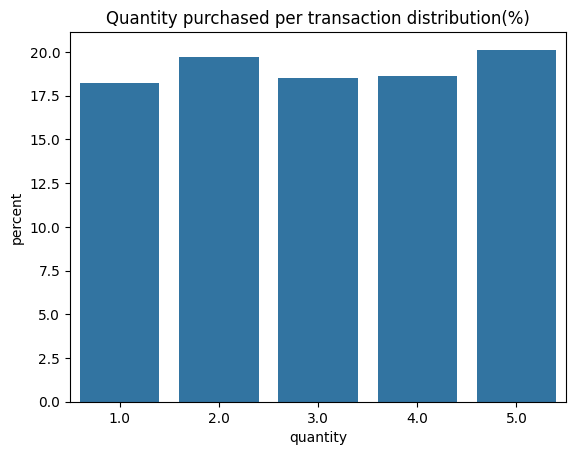

In [234]:
sns.countplot(copied_cafe_data, x= 'quantity', stat = 'percent' )
plt.title('Quantity purchased per transaction distribution(%)')
plt.show()

About 18 % of transactions only bought a single item , we could offer a promotion with the single item to increase `total_spent` for those who bought a single item only

 For example we could give a discount on a drink if the customer has bought food or vice versa , the profit margin might decrease per item, but overall the AOV will increase which will lead to higher revenue.

### Which days tend to have the most customers? 
Assuming each transaction is one customer , we can group the records by day of the week to answer the question above.

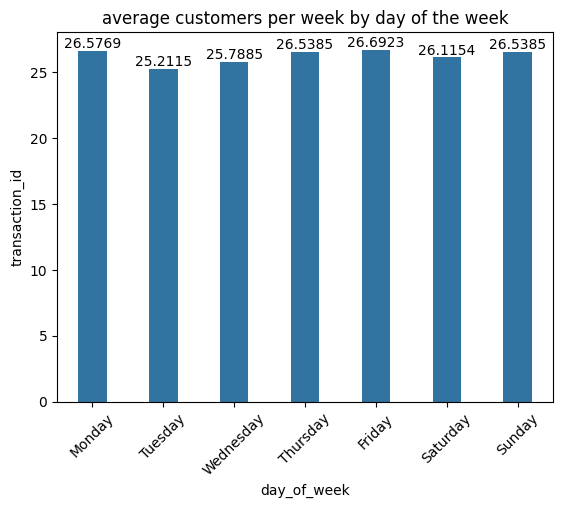

In [235]:
cust_day_of_week = sns.barplot(copied_cafe_data.groupby('day_of_week')['transaction_id'].count() / 52,order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] ,\
                               gap=0.5) # dividetd by 52(number of weeks in a year as dataset has data ranging a year) to get average customers per week by day of the week  

cust_day_of_week.bar_label(cust_day_of_week.containers[0])#adding data labels to the graph
plt.title('average customers per week by day of the week')
plt.xticks(rotation =45)
plt.show()

There seems to be a negligibile change in customers by day of the week.More granuality is needed e.g.time of transaction to find out when the cafe is less busy so that we could decide on the relevant promotion to run during the less busy days to increase transactions and an increase in revenue.

### Which days do we gain the most revenue?

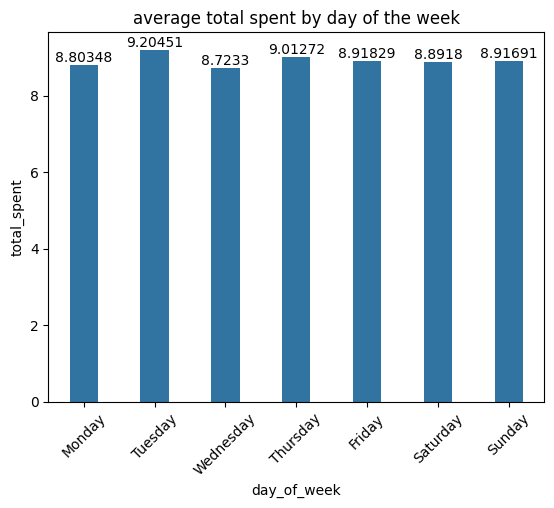

In [236]:
ts_day_of_week = sns.barplot(copied_cafe_data.groupby('day_of_week')['total_spent'].mean() ,order=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] ,\
                               gap=0.5) 

ts_day_of_week.bar_label(ts_day_of_week.containers[0])

plt.title('average total spent by day of the week')
plt.xticks(rotation =45)
plt.show()

Like number of customers per day, the average total spent by day of week doesnt change much and hovers around $8.8 - $9.2.

### What is the Cafe's Most popular item?

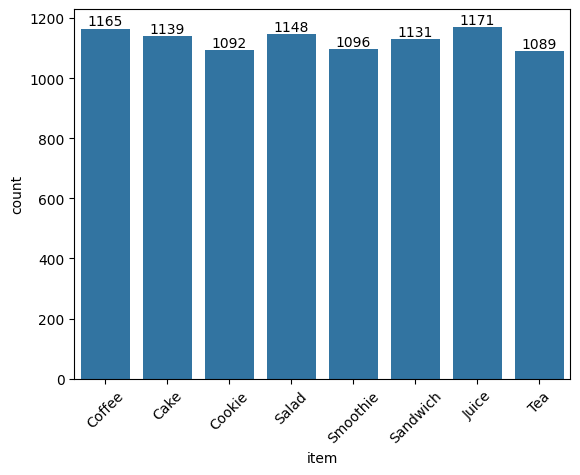

In [237]:
most_pop_item = sns.countplot(copied_cafe_data, x = 'item')
most_pop_item.bar_label(most_pop_item.containers[0])
plt.xticks(rotation = 45)
plt.show()

In [238]:
copied_cafe_data['item'].value_counts(dropna= False)


Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
NaN          969
Name: item, dtype: int64

The Juice and Coffee seeems to be the most popular items in our Cafe and Tea being the least popular. Although the diffence in the least and most popular item is about 80 or so.Do note that about 10% of the item column is empty hence better data collection of the items column will lead to a more fruitful analysis.

### Sale By Month


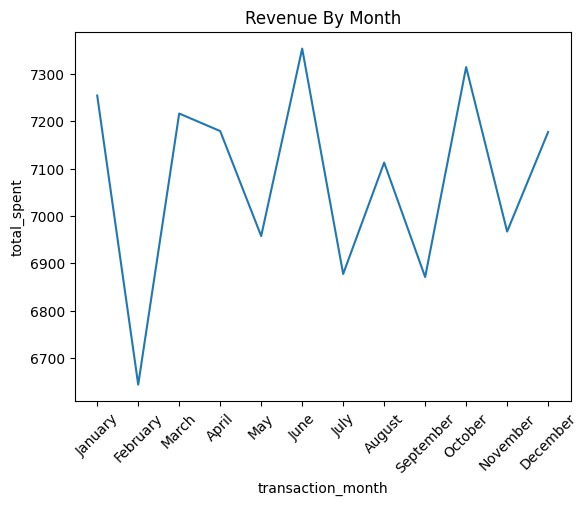

In [239]:
copied_cafe_data['transaction_month'] = copied_cafe_data['transaction_date'].dt.month#creating transaction month column to analyse by month
sns.lineplot(copied_cafe_data.groupby('transaction_month')['total_spent'].sum())
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ["January", "February", "March", "April", "May","June","July","August","September","October","November","December"],\
           rotation = 45)
plt.title("Revenue By Month")
plt.show()


There was a large decrease in monthly revenue from January to Feburary.Revenue peaked in June.Revenue roughly stays in the 6800 -7400 range with the exception of the month of Feburary.Further research and analysis needs to be done to find out why.

<Axes: >

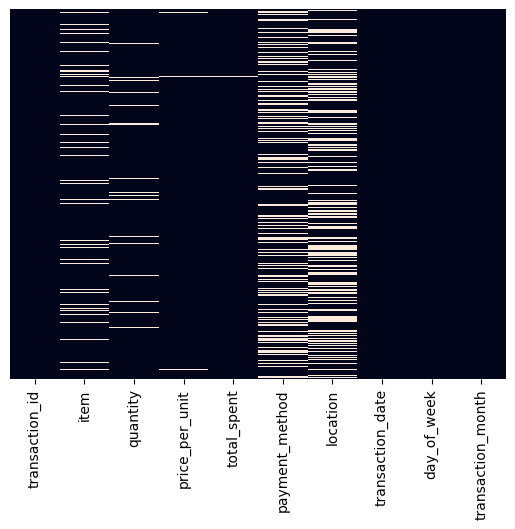

In [240]:
filtered_feb = copied_cafe_data.loc[copied_cafe_data['transaction_month'] == 2]
filtered_feb.shape
sns.heatmap(filtered_feb.isnull(),cbar= False, yticklabels= False)

It doesnt seem to be due to null values in the total_spent_column with only a few null values.It might be due to other factors (e.g marcoecnomic factors, natrual diaster , accident, closure etc). Further Research and analysis needs to be done.

## Summary
***
* What is the average order value(AOV) of a transacation?
   * Average Order Value : $ 8.91
   * About 18 % of transactions only bought a single item , we could offer a promotion with the single item to increase `total_spent` for those who bought a single item only

   * For example we could give a discount on a drink if the customer has bought food or vice versa , the profit margin might decrease per item, but overall the AOV will increase which will lead to higher revenue.

* Which days tend to have the most customers? 
  * There seems to be a negligibile change in customers by day of the week.More granuality is needed e.g.time of transaction to find out when the cafe is less busy so that we could decide on the relevant promotion to run during the less busy days to increase transactions and an increase in revenue.
* Which days do we gain the most revenue?
  * Like number of customers per day, the average total spent by day of week doesnt change much and hovers around $8.8 - $9.2.
* What is the Cafe's Most popular item?
  * The Juice and Coffee seeems to be the most popular items in our Cafe and Tea being the least popular. Although the difference between the least and most popular item is rather small.Do note that about 10% of the item column is empty hence better data collection of the items column will lead to a more fruitful analysis.
* Is the revenue consistent or seasonal?
    * There was a large decrease in monthly revenue from January to Feburary.Revenue peaked in June.Revenue roughly stays in the 6800 -7400 range with the exception of the month of Feburary.Further research and analysis needs to be done to find out why.
    * It doesnt seem to be due to null values in the `total_spent_column` with only a few null values.It might be due to other factors (e.g marcoecnomic factors, natrual diaster , accident, closure etc). Further Research and analysis needs to be done.


This is my first data analysis project which i mainly focuses on data cleaning and a little bit of EDA.Please do feel free to offer construcive criticism so that i can improve my skills! :)